In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data
members = pd.read_csv('./Filtered_Dataset/members_filtered.csv')
transactions = pd.read_csv('./Filtered_Dataset/transactions_filtered.csv')
user_logs = pd.read_csv('./Filtered_Dataset/user_logs_filtered.csv')
labels = pd.read_csv('./Filtered_Dataset/labels_filtered.csv')


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ShL7kdP+gwdyBi3YhGP4htqVdmOKvpj0rJpmL8C7eOU=,20160220,43,25,4,2,2,71,5062.465
1,p7pKFem5/7eX6HJu06kUCF1NFoi17dLn8Si5XEjJHQw=,20151029,27,7,3,0,45,66,12937.401
2,R98zl7XaTDQvesigEhXnouA/HBkMcHo4/AJBKNq7T0M=,20151225,40,1,2,0,42,75,11057.820
3,OlnbG5bNiVvizmqQpYBFADs49HPc7vuvGSwofHLOZQk=,20151113,56,1,0,1,21,72,5737.508
4,9vPk5I476zhmjj0kCCIejrwolkJK/Wq2yHzVhEMlgDc=,20150104,53,4,6,5,65,97,20073.451


In [9]:
# Validating, printing what's loaded

print('Members table \n', members[:10])
print('Transactions table \n',transactions[:10])
print('User logs table \n', user_logs[:10])
print('Labels table \n', labels[:10])



Members table 
                                            msno  city   bd  gender  \
0  YTFuZ4fwlXA+ABG6BgC7W4kUik/TN4lyvHVtcoWrmT8=     1  117  female   
1  hn63N9OgZY8kLfYrzI1ismsoSMaWg5QfnEPPbymKJys=    13   46    male   
2  n+fxY/sM/iXMmjRePbLDQD4GGIVR/+koJHBkAgxoE0s=     1   43    male   
3  svMMJG7wsnMyS4cgZwwbE40jFhiTXyhA/plxi1H/HzA=     1   43  female   
4  eqm5gi4wK9Sa0VNvaOVkXvb9LS8fYnt4Uw6Dp2oD9yM=     1    0     NaN   
5  GouiwMKr/Pn1oQZbC4hJ5c1+2PaXVb+22K1wdMGN9EU=     1    0     NaN   
6  zrCxS/egWGY9hE5IU/eRlmmLPbKiSGPnubgccyxDXm4=     1    0     NaN   
7  jIWCr3i+IYuzzTobcIcpWbt2bstGGT0gYIu1ooFNzPg=     1    0    male   
8  yJN34ud44D8tMKC59EClPDMYqVI7YmTWf61EpV4GPGU=     1    0     NaN   
9  ahfVbgTrD8PRNUdqheZ9Mfw462KdU7bgMb04aclUU6k=     1    0     NaN   

   registered_via  registration_init_time  
0              11                20130814  
1              13                20160905  
2               5                20160625  
3              11                2010

In [10]:
# Getting the date in YMD format

def pd_to_date(df_col):
    df_col = pd.to_datetime(df_col, format = '%Y%m%d')
    return df_col

In [11]:
# Getting the timestamps in a consistent format

user_logs['date'] = pd_to_date(user_logs['date'])
transactions['transaction_date'] = pd_to_date(transactions['transaction_date'])
transactions['membership_expire_date'] = pd_to_date(transactions['membership_expire_date'])
members['registration_init_time'] = pd_to_date(members['registration_init_time'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377942 entries, 0 to 377941
Data columns (total 9 columns):
msno                      377942 non-null object
payment_method_id         377942 non-null int64
payment_plan_days         377942 non-null int64
plan_list_price           377942 non-null int64
actual_amount_paid        377942 non-null int64
is_auto_renew             377942 non-null int64
transaction_date          377942 non-null datetime64[ns]
membership_expire_date    377942 non-null datetime64[ns]
is_cancel                 377942 non-null int64
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 26.0+ MB


In [14]:
# Getting more info on data

members.info()
print()
labels.info()
print()
transactions.info()
print()
user_logs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135344 entries, 0 to 135343
Data columns (total 6 columns):
msno                      135344 non-null object
city                      135344 non-null int64
bd                        135344 non-null int64
gender                    46680 non-null object
registered_via            135344 non-null int64
registration_init_time    135344 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17430 entries, 0 to 17429
Data columns (total 2 columns):
msno        17430 non-null object
is_churn    17430 non-null int64
dtypes: int64(1), object(1)
memory usage: 272.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377942 entries, 0 to 377941
Data columns (total 9 columns):
msno                      377942 non-null object
payment_method_id         377942 non-null int64
payment_plan_days         377942 non-null int64
plan_list_price           377942 non-nu

In [31]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ShL7kdP+gwdyBi3YhGP4htqVdmOKvpj0rJpmL8C7eOU=,2016-02-20,43,25,4,2,2,71,5062.465
1,p7pKFem5/7eX6HJu06kUCF1NFoi17dLn8Si5XEjJHQw=,2015-10-29,27,7,3,0,45,66,12937.401
2,R98zl7XaTDQvesigEhXnouA/HBkMcHo4/AJBKNq7T0M=,2015-12-25,40,1,2,0,42,75,11057.820
3,OlnbG5bNiVvizmqQpYBFADs49HPc7vuvGSwofHLOZQk=,2015-11-13,56,1,0,1,21,72,5737.508
4,9vPk5I476zhmjj0kCCIejrwolkJK/Wq2yHzVhEMlgDc=,2015-01-04,53,4,6,5,65,97,20073.451


In [32]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,YTFuZ4fwlXA+ABG6BgC7W4kUik/TN4lyvHVtcoWrmT8=,1,117,female,11,2013-08-14
1,hn63N9OgZY8kLfYrzI1ismsoSMaWg5QfnEPPbymKJys=,13,46,male,13,2016-09-05
2,n+fxY/sM/iXMmjRePbLDQD4GGIVR/+koJHBkAgxoE0s=,1,43,male,5,2016-06-25
3,svMMJG7wsnMyS4cgZwwbE40jFhiTXyhA/plxi1H/HzA=,1,43,female,11,2010-01-13
4,eqm5gi4wK9Sa0VNvaOVkXvb9LS8fYnt4Uw6Dp2oD9yM=,1,0,NaN,11,2010-10-08


In [33]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,
0,FfXjMk//Wl42NmWn1ObOdls9iiUSVODcCADRkOAJQwo=,20,100,480,480,0,2016-04-10,2016-07-19,0,2016-02-20
1,UVTPrMXzw7URpo8ptF3el7apz9ahJXZsw+MZWlDXf0I=,28,90,450,450,0,2015-09-12,2015-12-12,0,2015-10-29
2,qFFQQ0UwAJ60Uj1vyFHPzHZWjPEO5+7KeeORp8qUocw=,22,410,1788,1788,0,2015-11-02,2016-12-16,0,2015-12-25
3,DDum63q6H2X26t19DtJdt1OBjHDUk8JEuDE27iXaTWk=,22,180,799,799,0,2015-03-31,2015-10-01,0,2015-11-13
4,7kdO33Bp5WUw4/0YuzdEXEaEwvCe7Li/JKTi1zkPlrE=,20,100,480,480,0,2016-08-08,2016-11-16,0,2015-01-04


In [30]:
user_logs.describe()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,7.791229e+06,7.791229e+06,7.791229e+06,7.791229e+06,7.791229e+06,7.791229e+06,7.791229e+06
mean,6.523930e+00,1.651953e+00,1.025571e+00,1.134940e+00,3.098877e+01,3.039002e+01,-1.550797e+12
std,1.393133e+01,4.273261e+00,2.212964e+00,2.745800e+00,4.126392e+01,3.401776e+01,1.200432e+14
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.910700e+03
50%,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.683275e+03
75%,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.900000e+01,4.000000e+01,1.038703e+04
max,3.817000e+03,9.130000e+02,4.720000e+02,7.400000e+02,6.459000e+03,1.557000e+03,9.223372e+15


In [27]:
transactions.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,377942.000000,377942.000000,377942.000000,377942.000000,377942.000000,377942.000000
mean,38.723315,31.664372,142.690206,147.446502,0.831331,0.031190
std,3.605521,32.101523,137.808316,138.070353,0.374460,0.173831
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,30.000000,99.000000,119.000000,1.000000,0.000000
50%,40.000000,30.000000,149.000000,149.000000,1.000000,0.000000
75%,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000
max,41.000000,450.000000,2000.000000,2000.000000,1.000000,1.000000


In [28]:
members.describe()

,city,bd,registered_via
count,135344.000000,135344.000000,135344.000000
mean,3.849428,9.824529,5.254958
std,5.477382,17.254777,2.364830
min,1.000000,-50.000000,1.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,4.000000
75%,4.000000,21.000000,7.000000
max,22.000000,1821.000000,19.000000


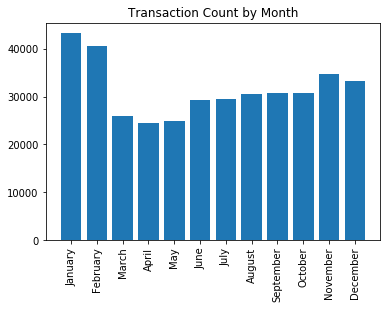

In [15]:
months = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}
transaction_count = {}
for key, value in months.items():
    transaction_count[key] = len(transactions[pd.DatetimeIndex(transactions['transaction_date']).month == key])
plt.bar(list(transaction_count.keys()), transaction_count.values())
plt.xticks(list(months.keys()), months.values(), rotation = 'vertical')
plt.title('Transaction Count by Month')
plt.show()

In [42]:
pd.DatetimeIndex(transactions['transaction_date']).month

Int64Index([ 4,  9, 11,  3,  8,  2, 10,  7, 11,  3,
            ...
             1,  7,  1, 11,  4,  5,  8,  1,  8,  8],
           dtype='int64', name='transaction_date', length=377942)